In [1]:
import pandas as pd
import numpy as np

## 1. Data Preparation

In [2]:
data = pd.read_csv("C:/Users/TOUFIQ KHAN/Documents/Job_Placement_Data.csv")


In [3]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
new_data = data.loc[:,['hsc_percentage','degree_percentage','status']]

In [9]:
new_data.head()

,hsc_percentage,degree_percentage,status
0,91.00,58.00,Placed
1,78.33,77.48,Placed
2,68.00,64.00,Placed
3,52.00,52.00,Not Placed
4,73.60,73.30,Placed


In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hsc_percentage     215 non-null    float64
 1   degree_percentage  215 non-null    float64
 2   status             215 non-null    object 
dtypes: float64(2), object(1)
memory usage: 5.2+ KB


In [13]:
new_data['status'] = new_data['status'].replace({'Placed':1,'Not Placed':0})
new_data.head()

C:\Users\TOUFIQ KHAN\AppData\Local\Temp\ipykernel_15792\2318737961.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data['status'] = new_data['status'].replace({'Placed':1,'Not Placed':0})


,hsc_percentage,degree_percentage,status
0,91.00,58.00,1
1,78.33,77.48,1
2,68.00,64.00,1
3,52.00,52.00,0
4,73.60,73.30,1


## 2. Exploratory Data analysis & Visualization

In [15]:
import matplotlib.pyplot as plt

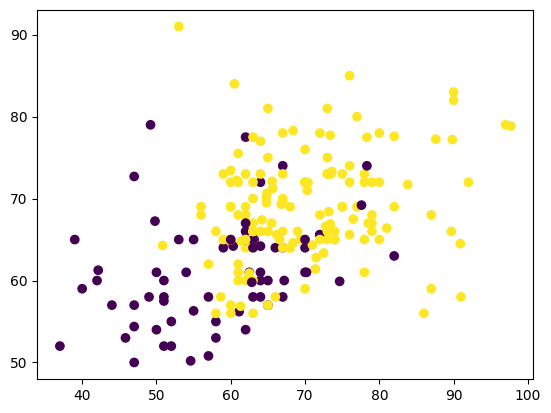

In [16]:
plt.scatter(new_data['hsc_percentage'],new_data['degree_percentage'],c = new_data['status'])
plt.show()

# Splitting

In [20]:
x = new_data.iloc[:,0:2]
y = new_data.iloc[:,-1]

In [22]:
x

,hsc_percentage,degree_percentage
0,91.00,58.00
1,78.33,77.48
2,68.00,64.00
3,52.00,52.00
4,73.60,73.30
...,...,...
210,82.00,77.60
211,60.00,72.00
212,67.00,73.00
213,66.00,58.00


In [24]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

## 3. Preprocessing

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [30]:
x_train

,hsc_percentage,degree_percentage
114,68.00,69.00
140,64.80,69.50
38,58.00,66.00
206,42.00,60.00
170,67.20,60.00
...,...,...
181,60.33,64.21
5,49.80,67.25
68,47.00,72.70
17,67.00,64.00


In [32]:
x_test

,hsc_percentage,degree_percentage
3,52.00,52.00
204,73.00,73.00
213,66.00,58.00
139,70.00,59.00
133,64.00,77.00
103,78.00,73.00
147,74.00,65.00
190,70.20,61.00
135,56.00,69.00
0,91.00,58.00


In [34]:
y_test

3      0
204    1
213    1
139    1
133    1
103    1
147    1
190    0
135    1
0      1
169    0
34     0
69     1
71     1
24     1
126    1
46     0
51     0
86     1
101    1
125    1
75     0
Name: status, dtype: int64

In [36]:
y_train

114    1
140    1
38     1
206    0
170    0
      ..
181    0
5      0
68     0
17     0
104    1
Name: status, Length: 193, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [45]:
x_train = scaler.fit_transform(x_train)

In [47]:
x_train

array([[ 1.71584068e-01,  3.57748600e-01],
       [-1.27075310e-01,  4.26610906e-01],
       [-7.61726487e-01, -5.54252363e-02],
       [-2.25502337e+00, -8.81772908e-01],
       [ 9.69192235e-02, -8.81772908e-01],
       [-5.00399531e-01,  8.02599096e-01],
       [ 7.82530124e-02, -1.15722213e+00],
       [ 3.02247546e-01, -1.93149848e-01],
       [ 3.58246179e-01,  1.32182088e+00],
       [ 7.31570401e-01, -5.54252363e-02],
       [-4.81733320e-01,  2.20023988e-01],
       [-2.95071209e-01,  8.22993756e-02],
       [-1.60170599e+00, -1.15722213e+00],
       [ 1.13569387e+00,  1.52565331e+00],
       [-3.10937489e-01, -9.10695077e-01],
       [-1.58303977e+00,  1.73499472e+00],
       [ 2.19686797e+00, -5.54252363e-02],
       [ 3.58816804e-03, -1.10515081e-01],
       [ 8.24901456e-01,  3.57748600e-01],
       [ 7.82530124e-02, -5.54252363e-02],
       [ 1.47821884e+00,  3.57748600e-01],
       [-1.50837493e+00, -1.70812058e+00],
       [-1.18675515e-01,  5.87748702e-01],
       [ 7.

In [49]:
x_test = scaler.transform(x_test)

In [51]:
x_test

array([[-1.32171282, -1.9835698 ],
       [ 0.63823935,  0.90864705],
       [-0.01507804, -1.15722213],
       [ 0.35824618, -1.01949752],
       [-0.20174015,  1.4595455 ],
       [ 1.10489462,  0.90864705],
       [ 0.7315704 , -0.19314985],
       [ 0.37691239, -0.7440483 ],
       [-0.9483886 ,  0.3577486 ],
       [ 2.31819834, -1.15722213],
       [-2.24009041, -0.7082399 ],
       [-1.41504387, -1.9835698 ],
       [ 0.63823935, -0.05542524],
       [ 0.38531218,  0.63319782],
       [ 2.94351642,  1.71571327],
       [-0.48173332,  1.25295858],
       [ 0.54304167, -0.11051508],
       [-0.47053359, -1.40512643],
       [-0.29507121, -0.33087446],
       [ 0.54490829,  0.22002399],
       [ 0.63823935,  0.90864705],
       [-0.38840226,  1.5284078 ]])

## 4. Modeling

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression()

In [57]:
clf.fit(x_train,y_train)

LogisticRegression()

## 5. Evaluation

In [63]:
y_pred = clf.predict(x_test)

In [65]:
y_test

3      0
204    1
213    1
139    1
133    1
103    1
147    1
190    0
135    1
0      1
169    0
34     0
69     1
71     1
24     1
126    1
46     0
51     0
86     1
101    1
125    1
75     0
Name: status, dtype: int64

# Accuracy of the model

In [69]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.8181818181818182

# Decision boundary

In [76]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [78]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

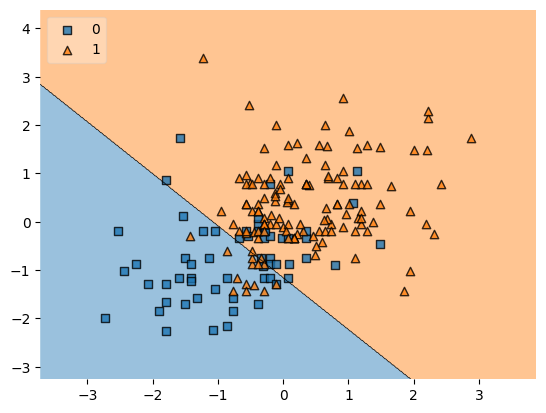

In [82]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

## 6. Deployment

In [84]:
import pickle

In [88]:
pickle.dump(clf,open('Model.pkl','wb'))